In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 12 09:42:28 2020

@author: Lenovo
"""

import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

model = h5py.File('D:\\EE599\\HW2\\binary_random_sp2020.hdf5','r')

human = model['human'][:]
machine = model['machine'][:]

(1)

Text(0.5, 1.0, 'Machine R')

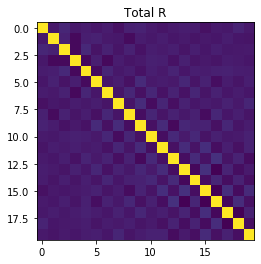

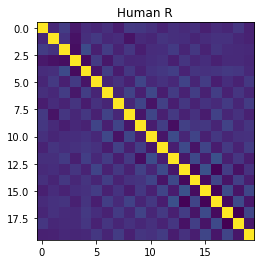

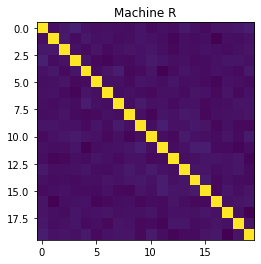

In [2]:
X = np.vstack( ( human, machine) )
R = (1 / np.shape(X)[0]) * (X.T @ X)
R_human = (1 / np.shape(human)[0]) * (human.T @ human)
R_machine = (1 / np.shape(machine)[0]) * (machine.T @ machine)

plt.figure()
plt.imshow(R, interpolation='nearest')
plt.title('Total R')

plt.figure()
plt.imshow(R_human, interpolation='nearest')
plt.title('Human R')

plt.figure()
plt.imshow(R_machine, interpolation='nearest')
plt.title('Machine R')

(2)

The variance of the most significant two components of human data is [1.86445274 1.41066602]
The percentage of the total variance is captured by these two components is 0.1637559379760544

The variance of the most significant two components of machine data is [1.14319724 1.10448058]
The percentage of the total variance is captured by these two components is 0.11238389107253198

The variance of the most significant two components of total data is [1.4301501  1.19809037]
The percentage of the total variance is captured by these two components is 0.13141202336136576


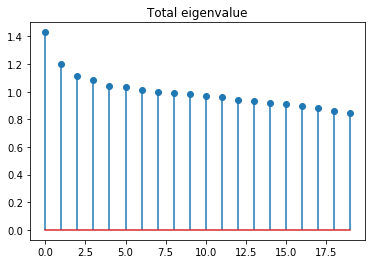

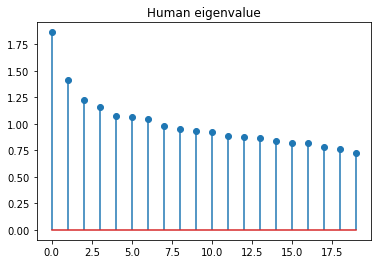

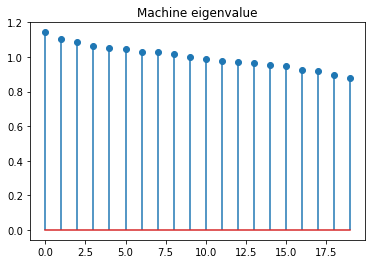

In [3]:
# 2
eig_val, eig_vec = LA.eig(R)
X_idx = eig_val.argsort()[::-1]
eig_val = eig_val[X_idx]
eig_vec = eig_vec[:, X_idx]
eig_val_first_percentage = np.sum(eig_val[0:2]) / np.sum(eig_val)

human_val, human_vec = LA.eig(R_human)
human_idx = human_val.argsort()[::-1]
human_val = human_val[human_idx]
human_vec = human_vec[:, human_idx]
human_val_first_percentage = np.sum(human_val[0:2]) / np.sum(human_val)

machine_val, machine_vec = LA.eig(R_machine)
machine_idx = machine_val.argsort()[::-1]
machine_val = machine_val[machine_idx]
machine_vec = machine_vec[:, machine_idx]
machine_val_first_percentage = np.sum(machine_val[0:2]) / np.sum(machine_val)

plt.figure()
plt.stem(eig_val, use_line_collection=True)
plt.title('Total eigenvalue')

plt.figure()
plt.stem(human_val, use_line_collection=True)
plt.title('Human eigenvalue')

plt.figure()
plt.stem(machine_val, use_line_collection=True)
plt.title('Machine eigenvalue')

print('The variance of the most significant two components of human data is', human_val[0:2])
print('The percentage of the total variance is captured by these two components is', human_val_first_percentage)
print()
print('The variance of the most significant two components of machine data is', machine_val[0:2])
print('The percentage of the total variance is captured by these two components is', machine_val_first_percentage)
print()
print('The variance of the most significant two components of total data is', eig_val[0:2])
print('The percentage of the total variance is captured by these two components is', eig_val_first_percentage)

e0 is the direction along which the data set has the largest variance, after e0 is found, in the remaining 19-dimension subspace, e1 is the direction along which subset has the largest variance. So e0 and e1 capture the most vairance. 

(3)

In [4]:
# 3
def linearClassifier(X, y):
    train_set = np.concatenate((X, y[:, None]), axis=1)
    np.random.shuffle(train_set)
    X = train_set[:, 0:20]
    y = train_set[:, -1]
    w = np.zeros(np.shape(human)[1])
    iter_time = 200
    m = np.shape(X)[0]
    eta = 0.1
    for i in range(iter_time):
        w = w - (1 / m) * (eta * X.T @ (X @ w - y))
    y_predict_soft = X @ w
    y_predict_hard = np.zeros(np.shape( y_predict_soft ))
    for i in range(np.shape(y_predict_soft)[0]):
        if y_predict_soft[i] >= 0:
            y_predict_hard[i] = 1
        else:
            y_predict_hard[i] = -1
    error_rate = np.sum(y_predict_hard != y) / np.shape(y)[0]
    return w, y_predict_soft, y_predict_hard, error_rate


y = np.append( np.ones(np.shape(human)[0]), -1 *  np.ones(np.shape(machine)[0]))
w_linear, y_pred_linear_soft, y_pred_linear_hard, error_rate_linear = linearClassifier(X, y)
print("Error rate by linear classifier is", error_rate_linear)

Error rate by linear classifier is 0.4707784431137725


(4)

Text(0.5, 1.0, 'distribution of the two classes')

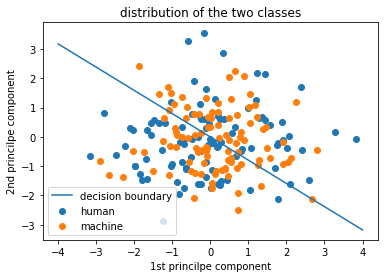

In [5]:
# 4
project_mat = eig_vec[:, 0:2]
humam_PCA = human @ project_mat
machine_PCA = machine @ project_mat
w_linear_PCA = w_linear @ project_mat
slot = (-1) / (w_linear_PCA[1] / w_linear_PCA[0])

num_to_show = 100
plt.figure()
plt.scatter(humam_PCA[0: num_to_show, 0], humam_PCA[0: num_to_show, 1], label='human')
plt.scatter(machine_PCA[0: num_to_show, 0], machine_PCA[0: num_to_show, 1], label='machine')
plt.xlabel('1st princilpe component')
plt.ylabel('2nd princilpe component')

x_axis = np.linspace(-4, 4, 1000)
decision_boundary = slot * x_axis
plt.plot(x_axis, decision_boundary, label='decision boundary')
plt.legend()
plt.title('distribution of the two classes')

(5)

In [6]:
# 5
def Sigmiod(x):
    return 1 / (1 + np.exp(-x))


def logisticalRegression(X, y):
    train_set = np.concatenate((X, y[:, None]), axis=1)
    np.random.shuffle(train_set)
    X = train_set[:, 0:20]
    m = np.shape(X)[0]
    y = train_set[:, -1]
    w = np.zeros(np.shape(human)[1])
    iter_time = 2000
    eta = 6.08
    for i in range(iter_time):
        w = w -(1 / m) * (eta * X.T @ (Sigmiod(X @ w) - y))
    y_predict_soft = X @ w
    y_predict_hard = np.zeros(np.shape( y_predict_soft ))
    for i in range(np.shape(y_predict_soft)[0]):
        if y_predict_soft[i] > 0.5:
            y_predict_hard[i] = 1
        else:
            y_predict_hard[i] = -1
    error_rate = np.sum(y_predict_hard != y) / np.shape(y)[0]
    return w, y_predict_soft, y_predict_hard, error_rate
w_log, y_pred_log_soft, y_pred_log_hard, error_rate_log = logisticalRegression(X, y)
print("Error rate by logistical regression is", error_rate_log)

Error rate by logistical regression is 0.4735329341317365


Note: for the error rate of logistical regression varies with learning rate eta, so the minimum error rate is shown, sklearn tools are also used to test the result, they are similiar.

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
pred_logis = clf.predict(X)
np.sum(pred_logis != y) / np.shape(y)[0]
print("Error rate by function in sklearn:", np.sum(pred_logis != y) / np.shape(y)[0])

Error rate by function in sklearn: 0.471377245508982
